# **clustering_kmeans**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [93]:
X, _ = load_iris(return_X_y=True)
X = X[:, [0, 1]]

sc = StandardScaler()
X = sc.fit_transform(X)

silhouette_avg_scores = []
k_range = range(3,20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels) 
    silhouette_avg_scores.append(score)  

fig_score = px.line(
    x=list(k_range),
    y=silhouette_avg_scores,
    markers=True,
    labels={'x': 'Amount of clusters (k)', 'y': 'Average silhouette coef'},
    title='Find optimal K with Silhouette method '
)
fig_score.show()

best_k = k_range[np.argmax(silhouette_avg_scores)]
kmeans_opt = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(X)
sample_silhouette_values = silhouette_samples(X, cluster_labels)


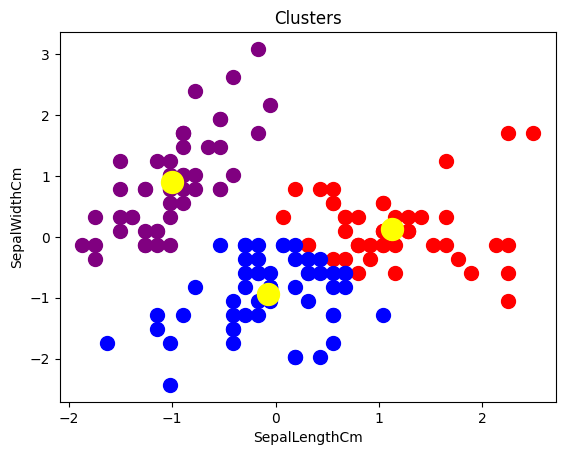

In [94]:
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s=100, c='red')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s=100, c='blue')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s=100, c='purple')
plt.scatter(kmeans_opt.cluster_centers_[:, 0], kmeans_opt.cluster_centers_[:, 1], s=250, c='yellow')
plt.title('Clusters')
plt.ylabel('SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.show()